In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [6]:
data = [train_data, test_data]
for df in data:
    df.loc[df['avg_training_score'] > 73,'tr_score_cat'] = 'H'
    df.loc[df['avg_training_score'] < 60,'tr_score_cat'] = 'L'
    df.loc[(df['avg_training_score'] <= 73) & (df['avg_training_score'] >=
                                               60),'tr_score_cat'] = 'M'

In [7]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,tr_score_cat
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,H
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,L
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,L
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,M
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,M


In [8]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
tr_score_cat               0
dtype: int64

In [9]:
train_data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [10]:
test_data['region'].value_counts()

region_2     5299
region_22    2739
region_7     1982
region_13    1167
region_15    1130
region_26    1011
region_31     844
region_4      775
region_27     710
region_28     595
region_16     590
region_11     571
region_23     516
region_32     433
region_29     414
region_19     410
region_17     361
region_14     350
region_5      342
region_25     337
region_20     326
region_6      298
region_30     273
region_8      269
region_10     269
region_1      238
region_24     219
region_12     215
region_9      180
region_21     179
region_34     155
region_3      147
region_33     126
region_18      20
Name: region, dtype: int64

In [11]:
r1 = ['region_1','region_10','region_11','region_12','region_13','region_14','region_15','region_16','region_31','region_30','region_27','region_26','region_20','region_2','region_19','region_8']
r2 = ['region_17','region_4','region_7','region_3','region_28','region_25','region_23','region_22']
r3 = ['region_18','region_9','region_6','region_5','region_34','region_33','region_32','region_29','region_24','region_21']

In [12]:
for df in data:
    df.loc[df['region'].isin(r1) ,'region_gp'] = 1
    df.loc[df['region'].isin(r2) ,'region_gp'] = 2
    df.loc[df['region'].isin(r3) ,'region_gp'] = 3

In [13]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,tr_score_cat,region_gp
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,L,2.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,M,2.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,L,1.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,L,2.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,M,1.0


Text(0.5, 1.0, 'Awards vs PrevRating Promoted Comparison')

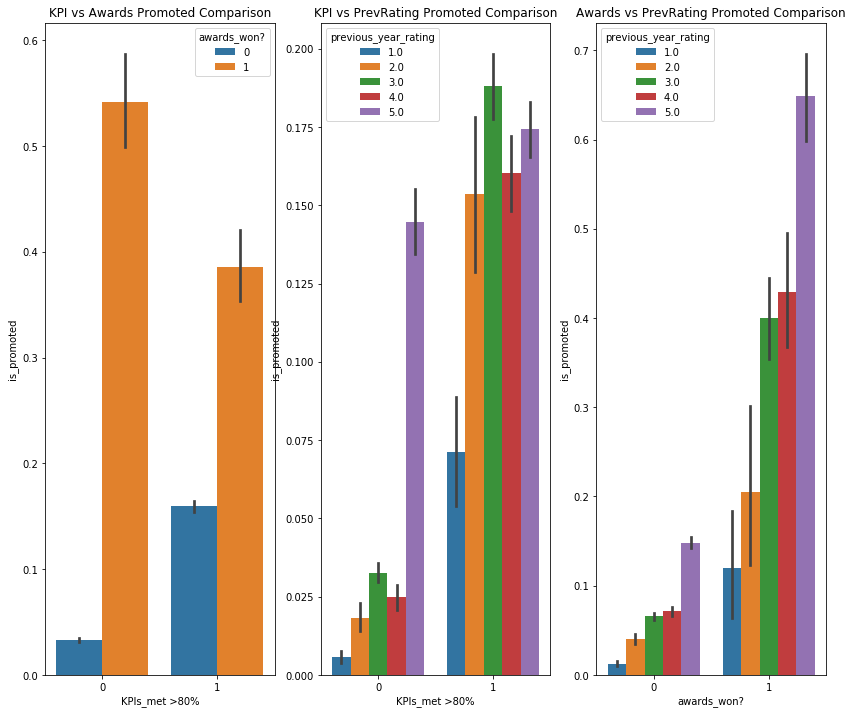

In [14]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'KPIs_met >80%', y ='is_promoted', hue = 'awards_won?', data=train_data, ax = qaxis[0])
qaxis[0].set_title('KPI vs Awards Promoted Comparison')

sns.barplot(x = 'KPIs_met >80%', y ='is_promoted' , hue = 'previous_year_rating', data=train_data, ax = qaxis[1])
qaxis[1].set_title('KPI vs PrevRating Promoted Comparison')

sns.barplot(x = 'awards_won?', y = 'is_promoted', hue = 'previous_year_rating', data=train_data, ax = qaxis[2])
qaxis[2].set_title('Awards vs PrevRating Promoted Comparison')

In [15]:
for df in data:
    df['KPI_AWard']  = df['KPIs_met >80%'] + df['awards_won?']
    df['KPI_Rating']  = df['KPIs_met >80%'] + df['previous_year_rating']
    df['AWard_Rating']  = df['awards_won?'] + df['previous_year_rating']

In [16]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,tr_score_cat,region_gp,KPI_AWard,KPI_Rating,AWard_Rating
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,L,2.0,1,6.0,5.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,M,2.0,0,5.0,5.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,L,1.0,0,3.0,3.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,L,2.0,0,1.0,1.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,M,1.0,0,3.0,3.0


In [17]:
mean_cols = ['KPIs_met >80%', 'awards_won?','previous_year_rating', 'department','region', 'education','gender', 'recruitment_channel']
for i in mean_cols:
    means = train_data.groupby(i).is_promoted.mean()
    train_data[i + "mean_target"] = train_data[i].map(means)
    test_data[i + "mean_target"] = test_data[i].map(means)

In [18]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,KPI_Rating,AWard_Rating,KPIs_met >80%mean_target,awards_won?mean_target,previous_year_ratingmean_target,departmentmean_target,regionmean_target,educationmean_target,gendermean_target,recruitment_channelmean_target
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,6.0,5.0,0.169094,0.076749,0.163615,0.072031,0.106546,0.098559,0.089934,0.085013
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,5.0,5.0,0.039587,0.076749,0.163615,0.090148,0.114188,0.082031,0.083151,0.083952
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,3.0,3.0,0.039587,0.076749,0.072779,0.072031,0.060641,0.082031,0.083151,0.085013
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,1.0,1.0,0.039587,0.076749,0.014141,0.072031,0.116596,0.082031,0.083151,0.083952
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,3.0,3.0,0.039587,0.076749,0.072779,0.107593,0.063274,0.082031,0.083151,0.083952
